<a href="https://colab.research.google.com/github/andrebelem/pythonverse/blob/main/Using_pygmt_in_COLAB_%5Bversion_2023%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![O2 Logo](http://observatoriooceanografico.org/wp-content/uploads/elementor/thumbs/logo-o2-2-p31vla9ib17i85olifd4l1xk0e5lktrkal6u0s4c6o.png)

# Installing GMT "fresh" and using PyGMT on Google Colab

**Author:** [A.L. Belem](mailto:andrebelem@id.uff.br) @ [Oceanographic Observatory](http://www.observatoiriooceanografico.uff.br)

This notebook was constructed for my students (Climate Change and its Impacts, Environmental Systems Modelling, Data Analysis in Oceanography, among others) in my classes and for those interested using [PyGMT](https://www.pygmt.org/latest/) to produce their figures. The challenge here was to use [GMT](https://www.generic-mapping-tools.org/) with PyGMT in the COLAB environment.

The lines below can work separately or together. The suggestion is that you keep running each line and studying both its content and the result. Copy to your Google Drive repository and modify as necessary (in addition to including your own annotations).

This Notebook is designed to be used in **Google Colab** only!

---

**History:**
- June 12, 2021: Version 1 released
- March 2023: Version 2 with new Google Colab adaptation


### First step

Installing conda. Note the kernel needs to be restarted for changes to be applied and this happens automatically. If you are wondering why you are seeing a message **"Your session crashed for an unknown reason"**, this is why. You can safely ignore this message!

In [1]:
%%capture
!pip install -q condacolab
import condacolab
condacolab.install()

**VERY IMPORTANTE NOTE**<BR>
Run the lines above and **WAIT** (at least a few seconds) because your kernel will restart.
<br>
Now, install pygmt with conda...(It takes a few minutes to install the whole thing). **Note**: testing this notebook 4 times averaged 3 minutes to install everything. Keep drinking your coffee if you want to wait. Note the `%%capture` prevents the massive output during installation.

In [1]:
%%capture
!conda install gmt pygmt

Just for the paranoics (answer should be )/usr/local/bin/gmt !

In [2]:
!which gmt

/usr/local/bin/gmt


Testing your pygmt in COLAB.

In [3]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.11.0
System information:
  python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.1.58+-x86_64-with-glibc2.35
Dependency information:
  numpy: 1.25.2
  pandas: 2.2.1
  xarray: 2024.2.0
  netCDF4: 1.6.5
  packaging: 23.2
  contextily: None
  geopandas: 0.13.2
  ipython: None
  rioxarray: None
  ghostscript: 10.02.1
GMT library information:
  binary version: 6.5.0
  cores: 2
  grid layout: rows
  image layout: 
  library path: /usr/local/lib/libgmt.so
  padding: 2
  plugin dir: /usr/local/lib/gmt/plugins
  share dir: /usr/local/share/gmt
  version: 6.5.0


And make your first figure ! Voilà !!

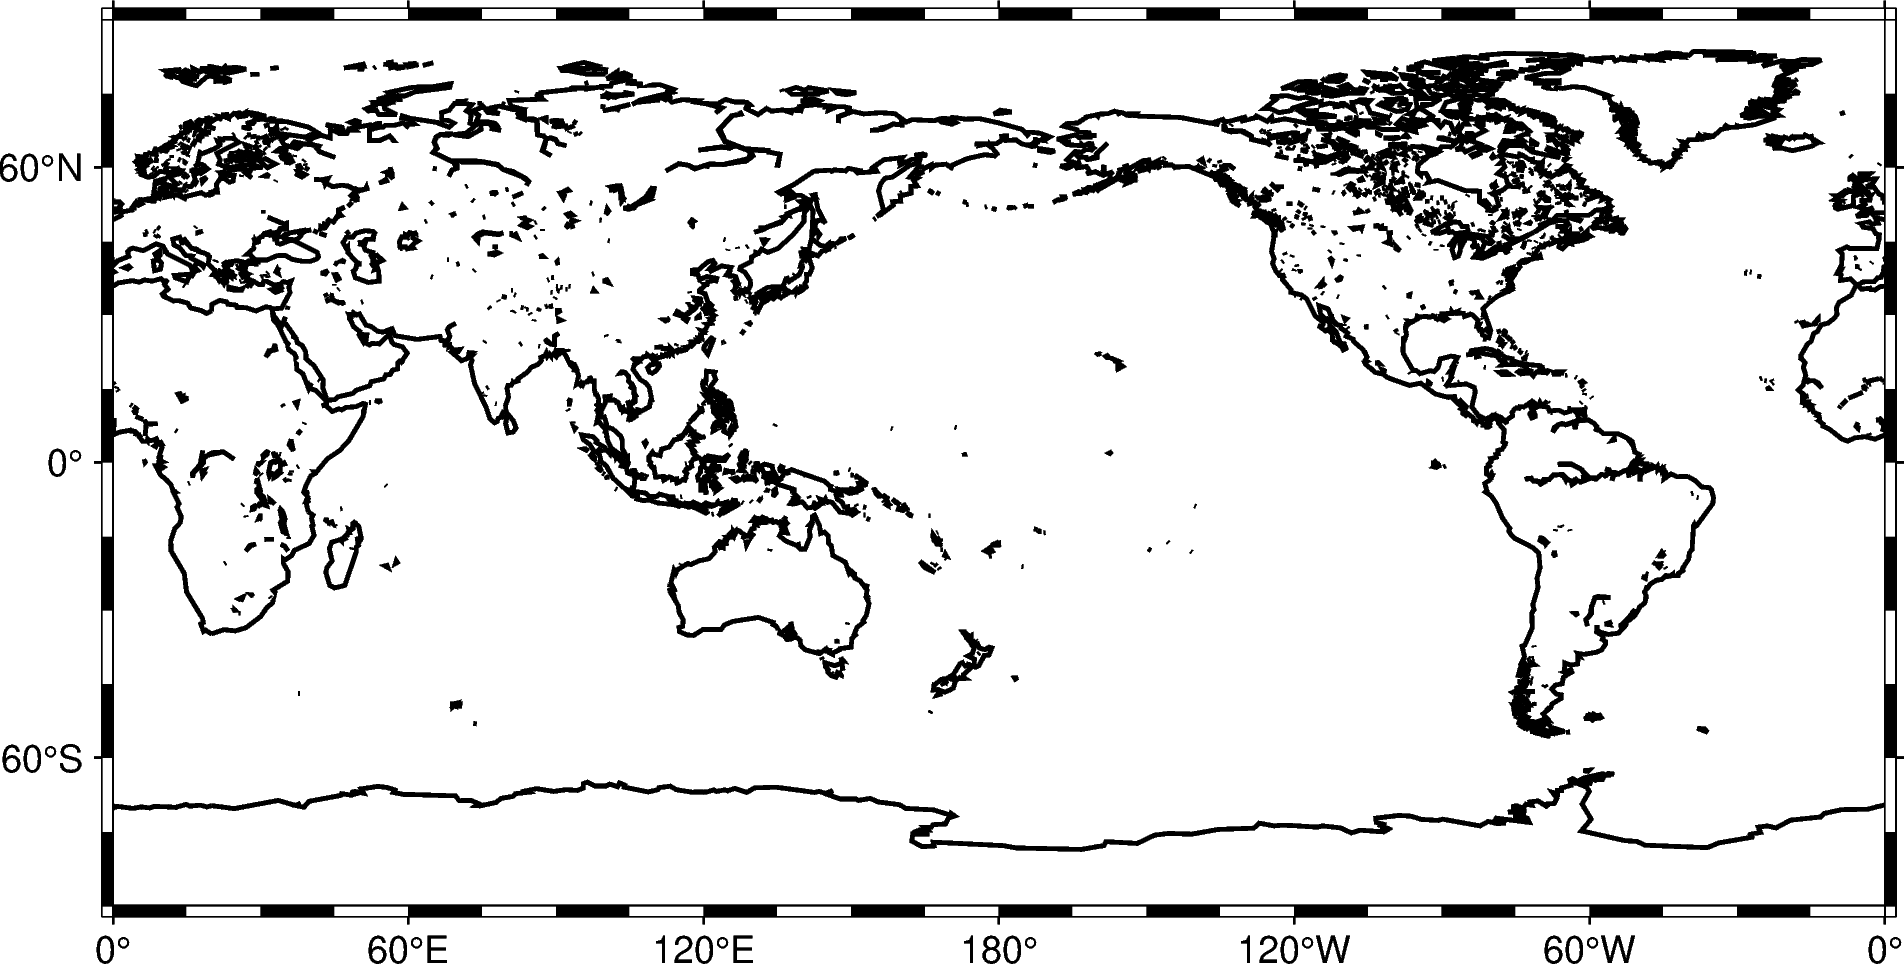

In [4]:
fig = pygmt.Figure()
fig.coast(region="g", frame=True, shorelines=1)
fig.show()

Another example...

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.5.5 at 05x05 arc minutes reduced by Gaussian Cartesian filtering (26.2 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 180x180 degree grid tile (earth_relief_05m_g): S90W180


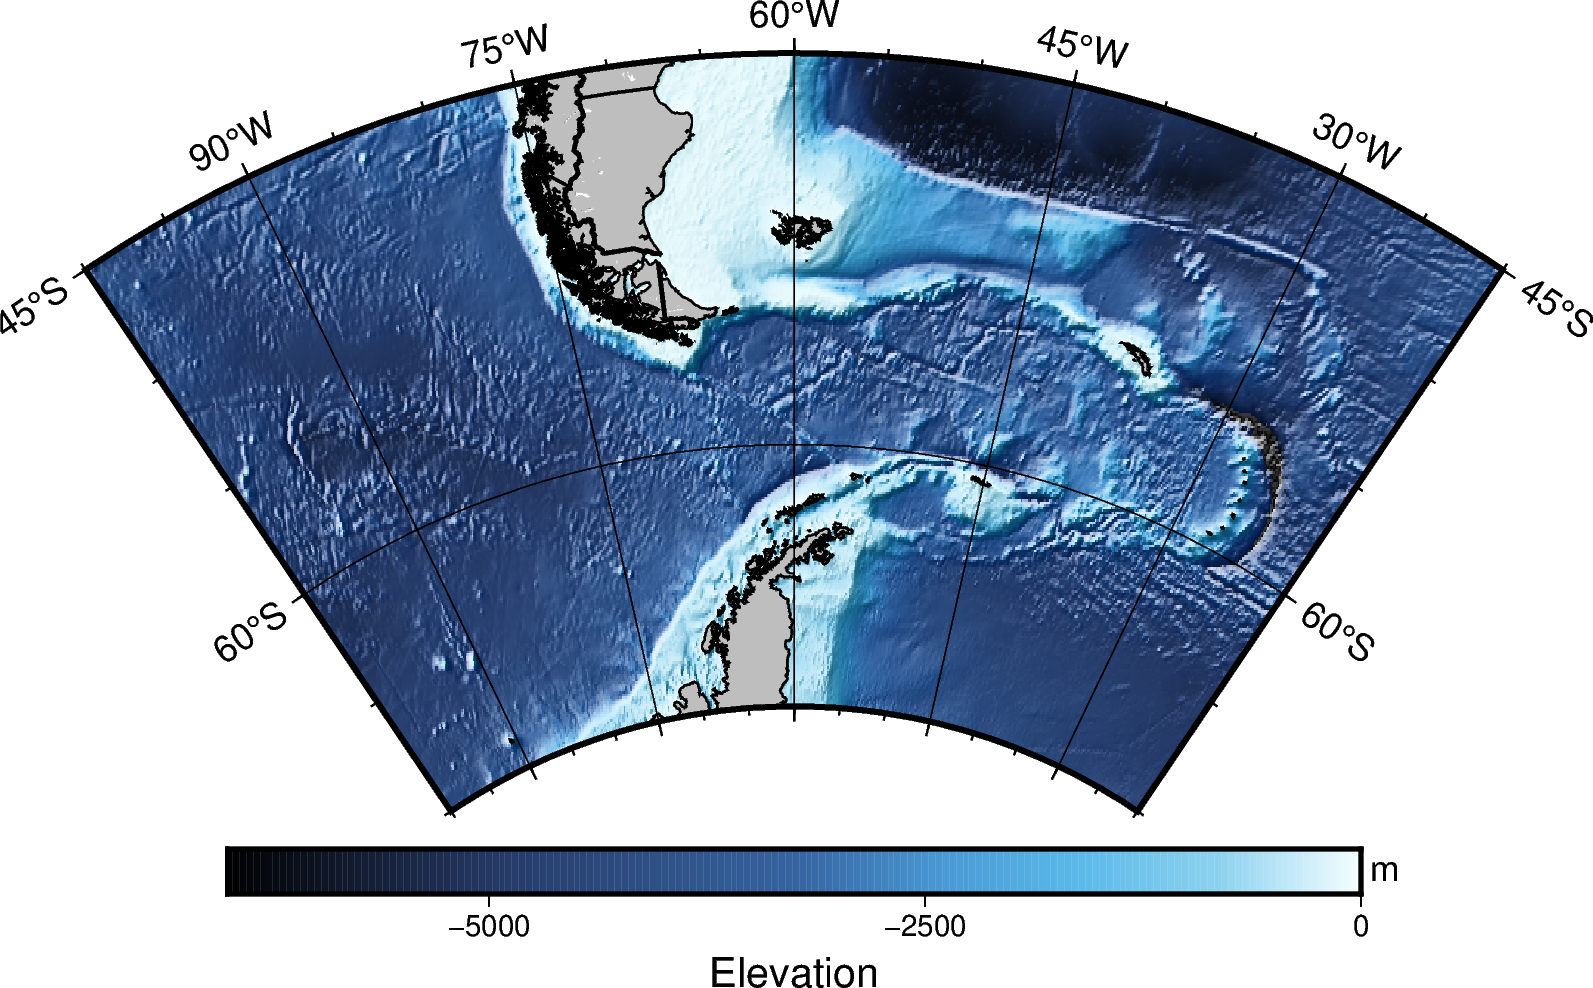

In [5]:
# make your magic and enjoy (just 14 seconds to run !)
import pygmt

grid = pygmt.datasets.load_earth_relief(
    "05m", region=[-100, -20, -70, -45], registration="gridline"
)
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="DF")

mycmap = pygmt.makecpt(cmap="geo", series=[-6500, 0, 10])

fig.grdimage(grid=grid,
    cmap=mycmap,
    region=[-100, -20, -70, -45],
    projection="L-60/-60/-70/-45/12c",
    shading='+a-45+nt1'
    )
fig.coast(
    shorelines="1/0.5p",
    region=[-100, -20, -70, -45],
    projection="L-60/-60/-70/-45/12c",
    land="gray",
    borders=["1/thick,black", "2/thin,black"],
    frame=['a15f5g15','WNsE']
)
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])

fig.show()

And if you're not tired yet..

grdimage [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdimage [NOTICE]: SRTM15 Earth Relief v2.5.5 at 10x10 arc minutes reduced by Gaussian Cartesian filtering (52.4 km fullwidth) [Tozer et al., 2019].
grdimage [NOTICE]:   -> Download grid file [2.9M]: earth_relief_10m_p.grd


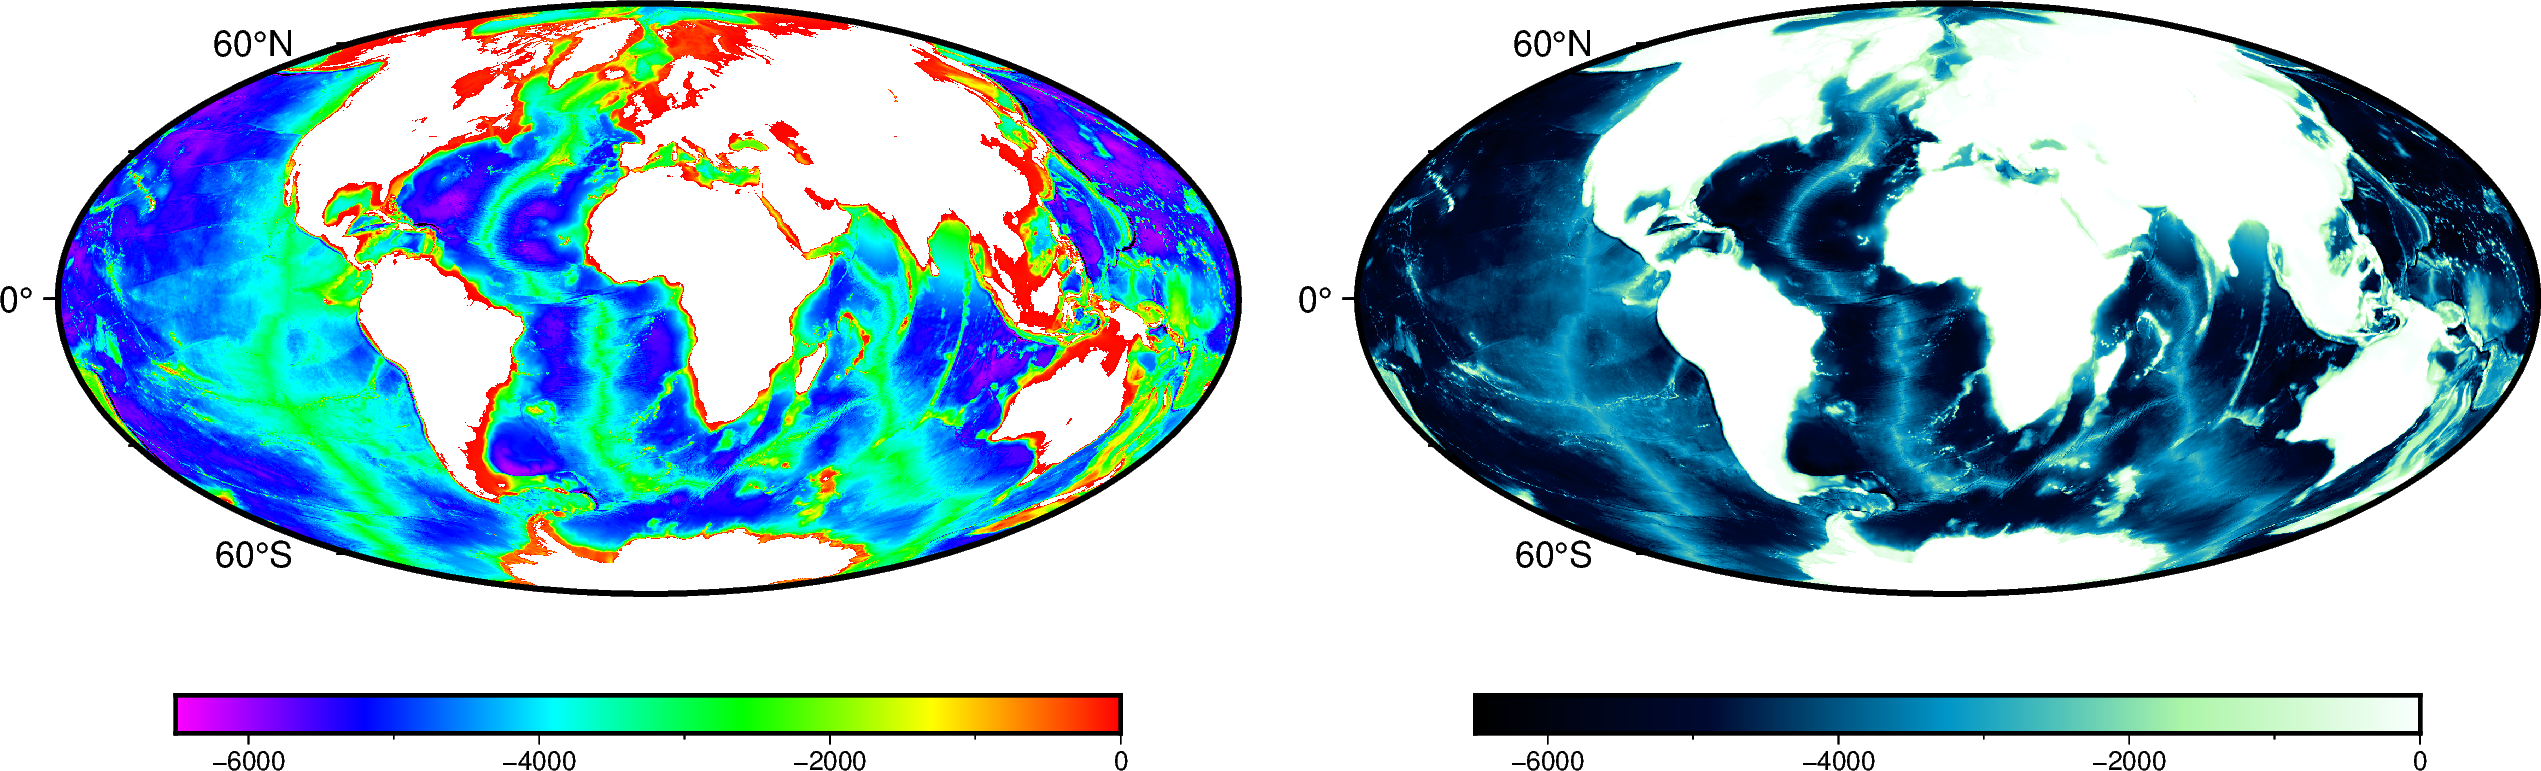

In [6]:
# another very good example, using two colormaps. Note the shifting of the second figure (just 7 seconds!)
import pygmt

fig = pygmt.Figure()
pygmt.makecpt(cmap="rainbow",series=[-6500, 0, 10])
fig.grdimage("@earth_relief_10m", projection="H10c", frame=True)
fig.colorbar(frame=True)

fig.shift_origin(xshift="11c")

pygmt.makecpt(cmap="ocean",series=[-6500, 0, 10])
fig.grdimage("@earth_relief_10m", projection="H10c", frame=True)
fig.colorbar(frame=True)
fig.show()

Enjoy your pygmt.